In [1]:
from stackapi import StackAPI
from bs4 import BeautifulSoup
import requests as re

import pandas as pd
import numpy as np

from random import randint    
from datetime import datetime, timedelta
from time import sleep

import json
import os
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pprint

client_id = os.environ.get("SPOTIPY_CLIENT_ID")
client_secret = os.environ.get("SPOTIPY_CLIENT_SECRET")

sp = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials())

from plotly import express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

from plotly import express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('Our_Songs_Database.csv', sep=';')
# df.dropna(subset=["id"], inplace=True)
df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.531,0.622,-7.751,0.4470,0.60200,0.000000,0.1180,0.5930,167.758,3SgnYOV9ONL0bIHaAcOYE1,454533
1,0.634,0.675,-7.351,0.0926,0.09900,0.000314,0.3620,0.6330,82.183,3IM7zXywZ6sRTtkRjRLxJ8,219866
2,0.826,0.490,-10.477,0.0676,0.00916,0.000004,0.0415,0.6270,74.126,75FYqcxt1YEAtqDLrOeIJn,180267
3,0.525,0.650,-6.961,0.0683,0.08520,0.133000,0.1330,0.7870,175.913,4p4hyqRFdoiw4EMbEsqBdA,289973
4,0.731,0.312,-13.899,0.0816,0.68300,0.879000,0.1040,0.4500,78.001,2Kqb9yoRNsSiHZT26dg2zs,223223
...,...,...,...,...,...,...,...,...,...,...,...
2124,0.851,0.567,-8.074,0.2310,0.21500,0.000000,0.0998,0.4460,119.969,7jbu9k6w67hWlhSinmGT3c,192213
2125,0.875,0.600,-6.818,0.0435,0.01890,0.014300,0.1320,0.0906,119.987,2jTujnt0y344ai1rNOywgr,162638
2126,0.792,0.793,-6.185,0.0841,0.08720,0.000000,0.2200,0.7750,123.031,3w1WjD2zJqjBjDz5fwqQPJ,156578
2127,0.640,0.553,-6.420,0.0411,0.05790,0.000000,0.0914,0.4860,81.992,6GUiIbJ834FcHewby3PwV0,148471


In [3]:
data = df.drop(["id"], axis=1)
data.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.531,0.622,-7.751,0.4470,0.60200,0.000000,0.1180,0.593,167.758,454533
1,0.634,0.675,-7.351,0.0926,0.09900,0.000314,0.3620,0.633,82.183,219866
2,0.826,0.490,-10.477,0.0676,0.00916,0.000004,0.0415,0.627,74.126,180267
3,0.525,0.650,-6.961,0.0683,0.08520,0.133000,0.1330,0.787,175.913,289973
4,0.731,0.312,-13.899,0.0816,0.68300,0.879000,0.1040,0.450,78.001,223223


In [4]:
# df["Male"] = (df["Sex"] == "male") * 1
# df["Female"] = (df["Sex"] == "female") * 1

In [5]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(data[["danceability", "energy", "loudness", "speechiness", "instrumentalness","liveness","valence","tempo","duration_ms"]])

In [6]:
data_normalized = pd.DataFrame(X_normalized, columns=["danceability", "energy", "loudness", "speechiness", "instrumentalness","liveness","valence","tempo","duration_ms"])

In [7]:
#pca = PCA(n_components=5)
pca = PCA(n_components=9)

In [8]:
pca.fit(X_normalized)

PCA(n_components=9)

In [9]:
# En utilisant pca.explained_variance_ratio_, tu peux obtenir une idée de la contribution de chaque composante principale à la variance des données.
# Cela peut t'aider à décider combien de composantes principales utiliser pour réduire la dimensionnalité ou pour d'autres analyses.
pca.explained_variance_ratio_

array([0.24212436, 0.15373646, 0.11444238, 0.11119032, 0.1037865 ,
       0.0924138 , 0.08803761, 0.07114155, 0.02312703])

In [10]:
# Déterminer combien de composantes principales tu souhaites conserver, en fonction du pourcentage de variance que tu souhaites préserver.
# Par exemple, si la somme cumulative atteint 0,95, cela signifie que les composantes principales retenues capturent 95 % de la variance totale des données.
np.cumsum(pca.explained_variance_ratio_)

array([0.24212436, 0.39586082, 0.51030319, 0.62149351, 0.72528001,
       0.81769381, 0.90573142, 0.97687297, 1.        ])

In [11]:
X_pca = pca.transform(X_normalized)

In [12]:
#kmeans = KMeans(n_clusters=8, n_init=10)
kmeans = KMeans(n_clusters=9, n_init=12)

In [13]:
kmeans.fit(X_pca)

c:\Users\theya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


KMeans(n_clusters=9, n_init=12)

In [14]:
cluster_ids = kmeans.predict(X_pca)

In [15]:
cluster_distances = kmeans.transform(X_pca)

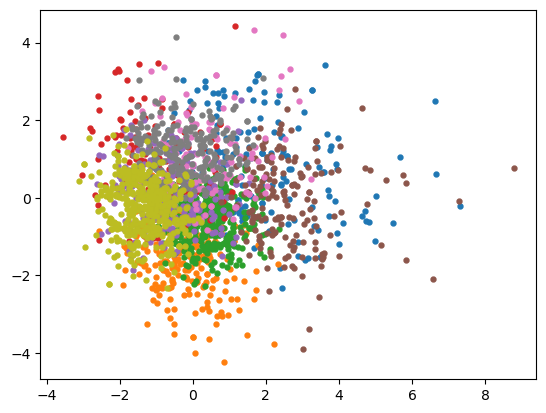

In [16]:
for c in np.unique(cluster_ids):
    plt.scatter(X_pca[cluster_ids == c, 0], X_pca[cluster_ids == c, 1], marker='.', s=50)

In [17]:
cluster_ids = KMeans(n_clusters=9, n_init=100).fit_predict(X_normalized)

c:\Users\theya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


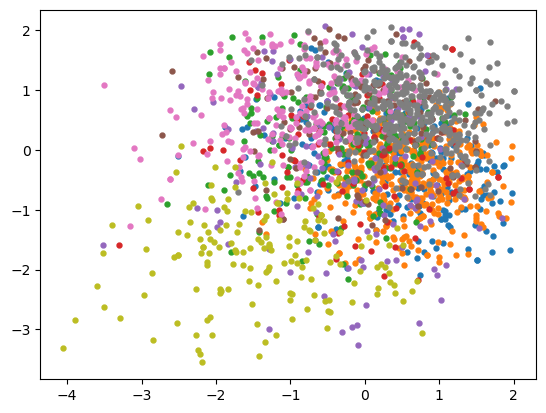

In [18]:
for c in np.unique(cluster_ids):
    plt.scatter(X_normalized[cluster_ids == c, 0], X_normalized[cluster_ids == c, 1], marker='.', s=50)

c:\Users\theya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


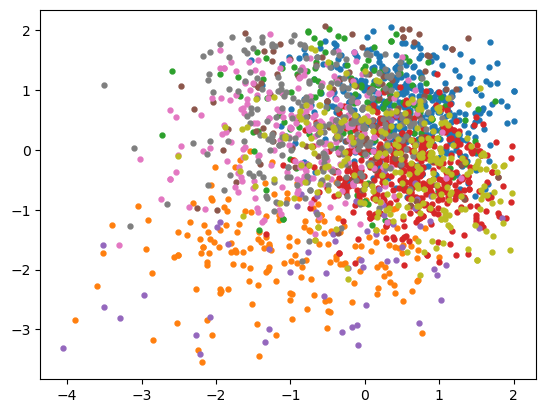

In [19]:
cluster_ids = KMeans(n_clusters=9, n_init=9).fit_predict(X_normalized)
for c in np.unique(cluster_ids):
    plt.scatter(X_normalized[cluster_ids == c, 0], X_normalized[cluster_ids == c, 1], marker='.', s=50)

c:\Users\theya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


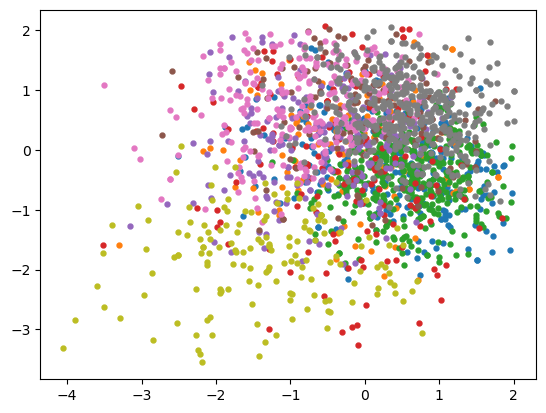

In [20]:
cluster_ids = KMeans(n_clusters=9, n_init=70).fit_predict(X_normalized)
for c in np.unique(cluster_ids):
    plt.scatter(X_normalized[cluster_ids == c, 0], X_normalized[cluster_ids == c, 1], marker='.', s=50)

c:\Users\theya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


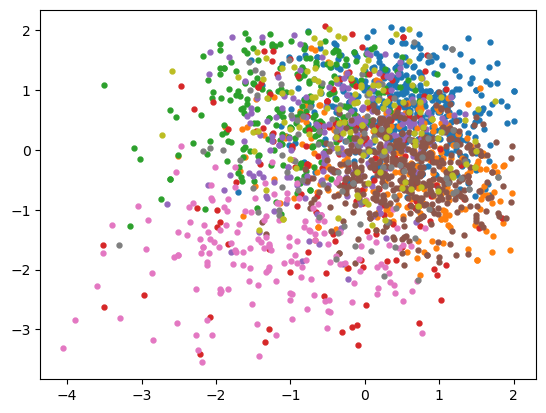

In [21]:
cluster_ids = KMeans(n_clusters=9, n_init=100).fit_predict(X_normalized)
for c in np.unique(cluster_ids):
    plt.scatter(X_normalized[cluster_ids == c, 0], X_normalized[cluster_ids == c, 1], marker='.', s=50)

c:\Users\theya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


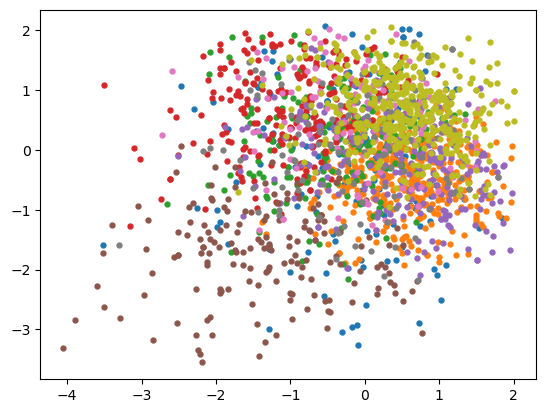

In [22]:
cluster_ids = KMeans(n_clusters=9, n_init=500).fit_predict(X_normalized)
for c in np.unique(cluster_ids):
    plt.scatter(X_normalized[cluster_ids == c, 0], X_normalized[cluster_ids == c, 1], marker='.', s=50)